<a href="https://colab.research.google.com/github/natadh/APT3025/blob/main/URLs(Phishing)(Weights%26Biases).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install pandas scikit-learn wandb matplotlib seaborn

In [54]:
import pandas as pd

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:
from sklearn.impute import SimpleImputer

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
import matplotlib.pyplot as plt

In [62]:
import seaborn as sns

In [63]:
from sklearn import tree

In [64]:
import wandb

In [65]:
wandb.login()

True

In [66]:
wandb.init(project="url-phishing-detection")

In [67]:
data = pd.read_csv('/content/urlset.csv', on_bad_lines='skip', encoding='latin1')

<ipython-input-67-da1a5b0b0db7>:1: DtypeWarning: Columns (1,2,3,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/urlset.csv', on_bad_lines='skip', encoding='latin1')


In [68]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [69]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96005 entries, 0 to 96004
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         96005 non-null  object 
 1   ranking        95953 non-null  object 
 2   mld_res        95935 non-null  object 
 3   mld.ps_res     95924 non-null  object 
 4   card_rem       95923 non-null  float64
 5   ratio_Rrem     95923 non-null  float64
 6   ratio_Arem     95923 non-null  float64
 7   jaccard_RR     95922 non-null  float64
 8   jaccard_RA     95921 non-null  float64
 9   jaccard_AR     95920 non-null  float64
 10  jaccard_AA     95919 non-null  float64
 11  jaccard_ARrd   95919 non-null  object 
 12  jaccard_ARrem  95917 non-null  object 
 13  label          95913 non-null  float64
dtypes: float64(8), object(6)
memory usage: 10.3+ MB
None


In [70]:
data.head(15)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971,1.0
5,smilesvoegol.servebbs.org/voegol.php,10000000,0.0,0.0,2.0,223.500000,234.000000,0.000000,0.000000,0.000000,0.000000,0,0.852227,1.0
6,premierpaymentprocessing.com/includes/boleto-2...,10000000,0.0,0.0,4.0,119.000000,121.500000,0.000000,0.000000,0.000000,0.000000,0,0.853565,1.0
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,10000000,0.0,0.0,4.0,160.500000,157.250000,0.000000,0.000000,0.000000,0.000000,0,0.777622,1.0
8,super1000.info/docs,10000000,0.0,0.0,1.0,21.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0,0.36,1.0
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,10000000,0.0,0.0,16.0,142.375000,142.500000,0.000000,0.000000,0.000000,0.000000,0,0.803006,1.0


In [71]:
data.isnull().sum()

domain            0
ranking          52
mld_res          70
mld.ps_res       81
card_rem         82
ratio_Rrem       82
ratio_Arem       82
jaccard_RR       83
jaccard_RA       84
jaccard_AR       85
jaccard_AA       86
jaccard_ARrd     86
jaccard_ARrem    88
label            92
dtype: int64

In [72]:
string_columns = data.select_dtypes(include=['object']).columns

In [73]:
label_encoders = {}
for col in string_columns:
    data[col] = data[col].astype(str)  # Convert all values to strings
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [74]:
# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data))
data_imputed.columns = data.columns

In [75]:
X = data_imputed.drop(columns=['label'])
y = data_imputed['label']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

In [78]:
# Decision Tree
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
dec_tree_accuracy = accuracy_score(y_test, y_pred_dec_tree)

In [79]:
import pydotplus

In [80]:
from IPython.display import Image

In [81]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [82]:
clf=clf.fit(X,y)

In [83]:
dot_data=tree.export_graphviz(clf,feature_names=X.columns,class_names=['1','0'],filled=True,out_file=None)

In [84]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="jaccard_ARrd <= 0.5\\nentropy = 1.0\\nsamples = 96005\\nvalue = [48101, 47904]\\nclass = 1", fillcolor="#fffefe"] ;\n1 [label="card_rem <= 4.5\\nentropy = 0.582\\nsamples = 44112\\nvalue = [6131, 37981]\\nclass = 0", fillcolor="#59ade9"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="domain <= 50717.0\\nentropy = 0.833\\nsamples = 21895\\nvalue = [5777, 16118]\\nclass = 0", fillcolor="#80c0ee"] ;\n1 -> 2 ;\n3 [label="entropy = 0.382\\nsamples = 12150\\nvalue = [902, 11248]\\nclass = 0", fillcolor="#49a5e7"] ;\n2 -> 3 ;\n4 [label="entropy = 1.0\\nsamples = 9745\\nvalue = [4875, 4870]\\nclass = 1", fillcolor="#ffffff"] ;\n2 -> 4 ;\n5 [label="ranking <= 38.0\\nentropy = 0.118\\nsamples = 22217\\nvalue = [354, 21863]\\nclass = 0", fillcolor="#3c9fe5"] ;\n1 -> 5 ;\n6 [label="entropy = 0.056\\nsamples = 21327\\nvalue = [138, 21189]\\n

In [85]:
graph=pydotplus.graph_from_dot_data(dot_data)

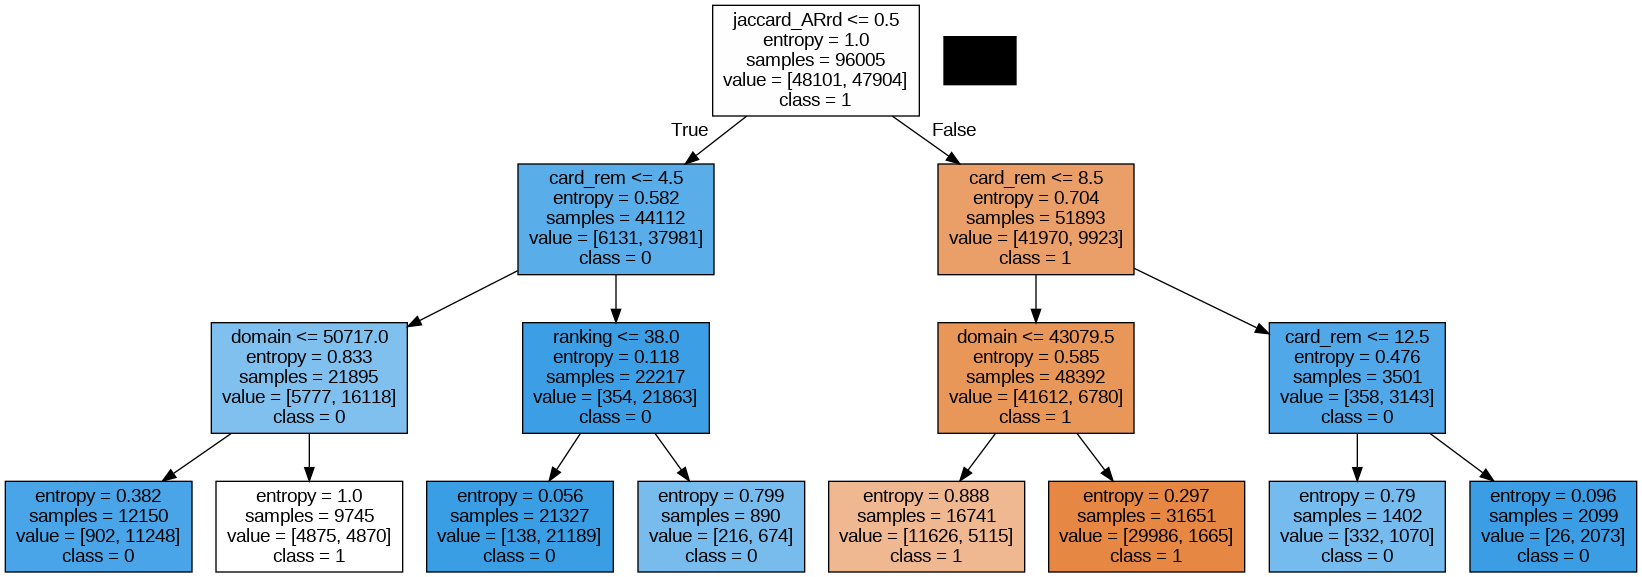

In [86]:
graph

Image(graph.create_png())

In [87]:
print(f'Logistic Regression Accuracy: {log_reg_accuracy}')
print(f'Decision Tree Accuracy: {dec_tree_accuracy}')

Logistic Regression Accuracy: 0.8199083396986321
Decision Tree Accuracy: 0.9485799597250191


In [88]:
#wandb.log({
    #"Logistic Regression Accuracy": log_reg_accuracy,
    #"Decision Tree Accuracy": dec_tree_accuracy
#})

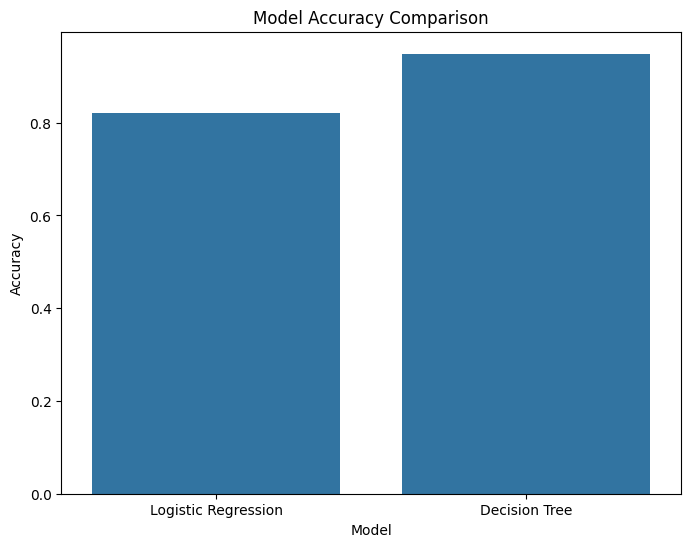

In [89]:
plt.figure(figsize=(8, 6))
models = ['Logistic Regression', 'Decision Tree']
accuracies = [log_reg_accuracy, dec_tree_accuracy]
sns.barplot(x=models, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [90]:
accuracy_chart_path = "model_accuracy_comparison.png"
plt.savefig(accuracy_chart_path)

<Figure size 640x480 with 0 Axes>

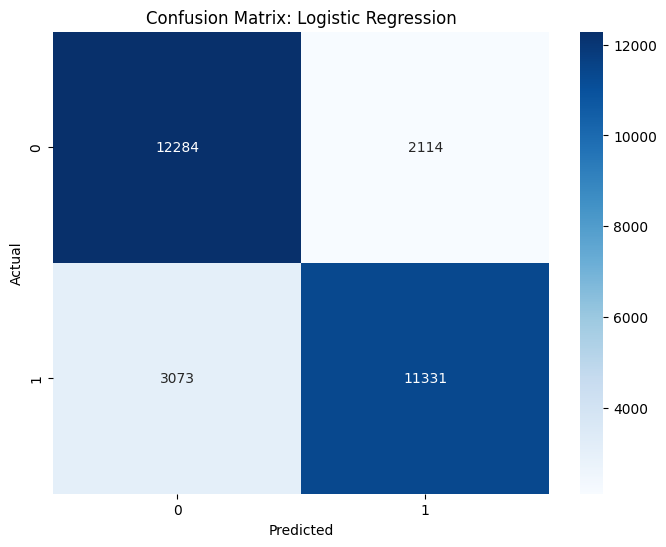

In [91]:
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

In [49]:
conf_matrix_log_reg_path = "confusion_matrix_log_reg.png"
plt.savefig(conf_matrix_log_reg_path)


<Figure size 640x480 with 0 Axes>

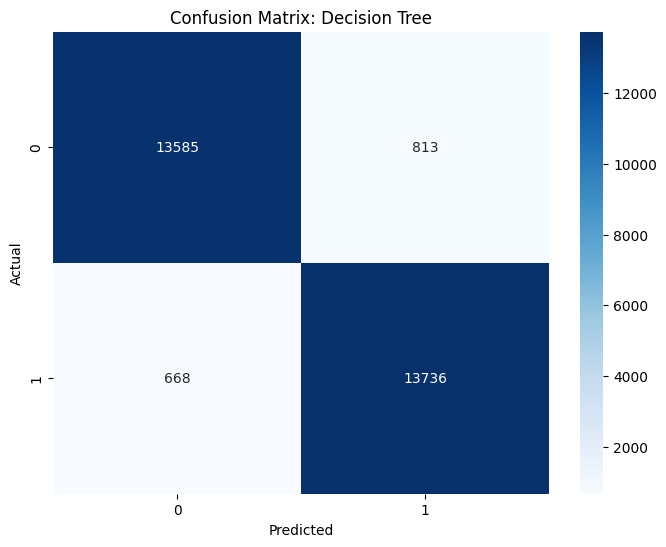

In [92]:
conf_matrix_dec_tree = confusion_matrix(y_test, y_pred_dec_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dec_tree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Decision Tree')
plt.show()

In [93]:
conf_matrix_dec_tree_path = "confusion_matrix_dec_tree.png"
plt.savefig(conf_matrix_dec_tree_path)

<Figure size 640x480 with 0 Axes>

In [94]:
wandb.log({
    "Logistic Regression Accuracy": log_reg_accuracy,
    "Decision Tree Accuracy": dec_tree_accuracy,
    "Model Accuracy Comparison": wandb.Image(accuracy_chart_path),
    "Confusion Matrix Logistic Regression": wandb.Image(conf_matrix_log_reg_path),
    "Confusion Matrix Decision Tree": wandb.Image(conf_matrix_dec_tree_path)
})

In [95]:
wandb.finish()

Decision Tree Accuracy,▁
Logistic Regression Accuracy,▁
Decision Tree Accuracy,0.94858
Logistic Regression Accuracy,0.81991
